1. Import necessary packages

In [5]:
%reload_ext nb_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2. Load and prepare the dataset
Load the dataset into a dataframe named df_data.

Drop the name column. This column is not a feature required by the model.

Create a dataframe named X containing all the columns except the status.

Create a dataframe named y containing the status.

In [10]:
df_data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
)
df_drop = df_data.drop(columns=("name"))
X = df_drop.drop(columns=("status"))
y = df_drop["status"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3. Split the dataset into a training set and a test set


In [11]:
X_test, X_train, y_test, y_train = train_test_split(X, y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Create the model

Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.

Fit the classifier to the data.


In [14]:
lr = LogisticRegression(solver="lbfgs", penalty="none")
lr.fit(X_train, y_train)

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If the algorithm fails to converge, what change can you make to fix that?

In [18]:
lr = LogisticRegression(solver="lbfgs", penalty="none", max_iter=1000)
lr.fit(X_train, y_train)

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5. Calculate Accuracy

Calculate and print the accuracy of the model on the test data.

In [26]:
print("The accuracy of the model is:")
print(lr.score(X_test, y_test))

The accuracy of the model is:
0.821917808219178


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. L2 Regularization

Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [27]:
lr = LogisticRegression(solver="lbfgs", penalty="l2", max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
print("The accuracy of the model is:")
print(lr.score(X_test, y_test))

The accuracy of the model is:
0.863013698630137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7. Choose the C parameter

Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.


In [36]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver="lbfgs", penalty="l2", C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

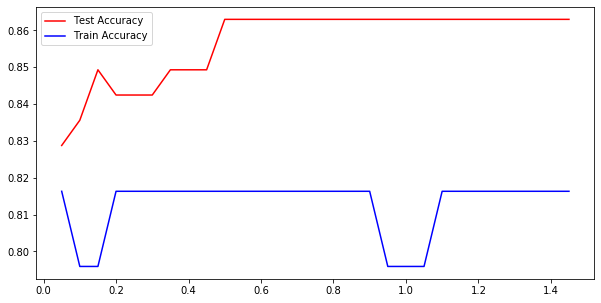

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(c_vals, test_accuracy, "-r", label="Test Accuracy")
plt.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
plt.legend()
plt.show()